## Introduction
Keras is a high-level neural networks API, written in Python and capable of running on top of several lower-level frameworks such as TensorFlow and Theano. It was developed with a focus on enabling fast experimentation with deep neural networks, and as a result, it has a user-friendly interface and a modular architecture that allows for easy building and customization of models.

### Basic coding example that shows how to use Keras to create a simple neural network

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Dataset Loading

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Normalize the data and convert the labels to one-hot encoding

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
print('Training set shape:', x_train.shape, y_train.shape)
print('Test set shape:', x_test.shape, y_test.shape)

Training set shape: (60000, 28, 28) (60000, 10)
Test set shape: (10000, 28, 28) (10000, 10)


### Dataset visualization

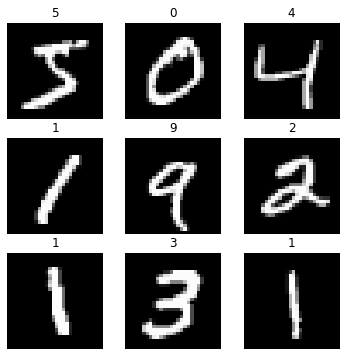

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(str(y_train[i].argmax()))
    ax.axis('off')
plt.show()

## Model

In [10]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3375 - accuracy: 0.9048 - val_loss: 0.1890 - val_accuracy: 0.9465
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1667 - accuracy: 0.9526 - val_loss: 0.1385 - val_accuracy: 0.9607
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1216 - accuracy: 0.9649 - val_loss: 0.1270 - val_accuracy: 0.9616
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0960 - accuracy: 0.9718 - val_loss: 0.1188 - val_accuracy: 0.9656
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0800 - accuracy: 0.9759 - val_loss: 0.1079 - val_accuracy: 0.9694


In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1003 - accuracy: 0.9692
Test accuracy: 0.9692000150680542


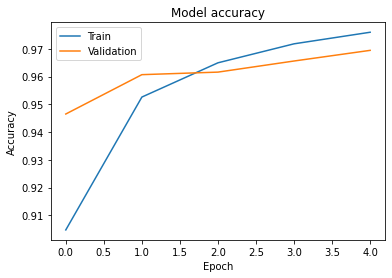

In [14]:
# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


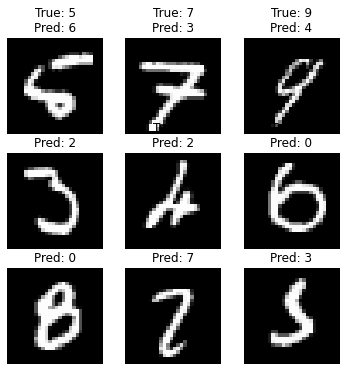

In [15]:
# Plot some misclassified images
y_pred = model.predict(x_test)
misclassified_idx = (y_pred.argmax(axis=1) != y_test.argmax(axis=1))
misclassified_images = x_test[misclassified_idx]
misclassified_labels = y_test[misclassified_idx]
misclassified_pred = y_pred[misclassified_idx]
fig, axs = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(misclassified_images[i], cmap='gray')
    ax.set_title('True: %s\nPred: %s' % (misclassified_labels[i].argmax(), misclassified_pred[i].argmax()))
    ax.axis('off')
plt.show()